In [1]:
import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.img_tiles as cimgt

In [2]:
# Load the dataset
df = pd.read_pickle('cabspotting/cabspotting.pkl')

In [3]:
df.head(10)

latitude  longitude  occupied
taxi   time                                              
abboip 2008-05-17 14:12:10  37.75153 -122.39447         0
       2008-05-17 14:13:34  37.75149 -122.39447         0
       2008-05-17 14:14:34  37.75149 -122.39447         0
       2008-05-17 14:15:35  37.75149 -122.39446         0
       2008-05-17 14:41:43  37.75144 -122.39449         0
       2008-05-17 14:42:54  37.75151 -122.39453         0
       2008-05-17 14:43:54  37.75137 -122.39502         0
       2008-05-17 14:44:49  37.75139 -122.39498         0
       2008-05-17 14:45:49  37.75140 -122.39495         0
       2008-05-17 14:46:50  37.75140 -122.39496         0

In [12]:
r = df.loc['abboip']

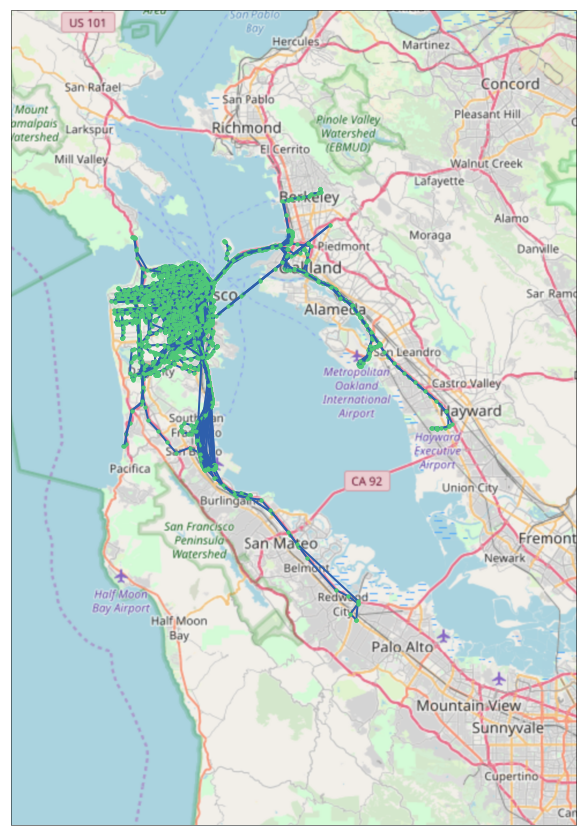

In [17]:
# Plot a single trajectory as a line

plt.figure(figsize = (15, 15))

img = cimgt.OSM()

ax = plt.axes(projection = img.crs)
#ax.set_extent((-122.507416667, -122.38319, 37.61075, 37.79654))
ax.set_extent((-122.628295, -121.95391333333333, 37.276830000000004, 38.04691))

ax.add_image(img, 10, interpolation = 'bicubic')

for row in range(r.shape[0] - 2) :
    lat_1 = r.iloc[row]['latitude']
    lon_1 = r.iloc[row]['longitude']
    lat_2 = r.iloc[row + 1]['latitude']
    lon_2 = r.iloc[row + 1]['longitude']
    plt.plot([lon_1, lon_2], [lat_1, lat_2],
             color = '#2E5FAC', linewidth = 2,
             marker = 'o', markerfacecolor = '#50C878',
             markeredgecolor = '#50C878', markersize = 3,
             transform = ccrs.PlateCarree())

plt.savefig('../Images/cabspotting_abboip_line.png', dpi = 300, bbox_inches = 'tight')

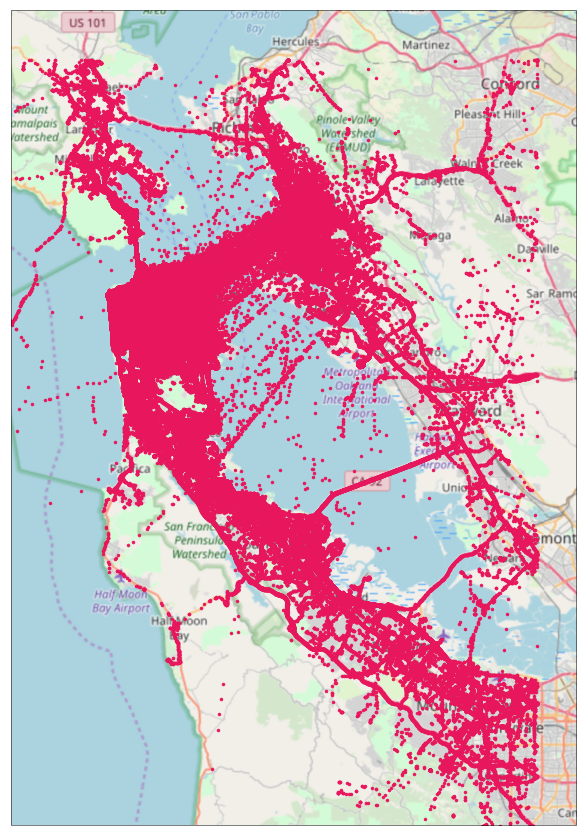

In [14]:
# Plot all records in the dataset

plt.figure(figsize = (15, 15))

img = cimgt.OSM()

ax = plt.axes(projection = img.crs)
ax.set_extent((-122.628295, -121.95391333333333, 37.276830000000004, 38.04691))

ax.add_image(img, 10, interpolation = 'bicubic')

plt.scatter(df['longitude'], df['latitude'], transform = ccrs.PlateCarree(),
           c = '#E8175D', s = 9)

plt.savefig('../Images/cabspotting_all_records.png', dpi = 300, bbox_inches = 'tight')